In [3]:
# Import main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [5]:
df = pd.read_csv('Zillow.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   airconditioningtypeid         25007 non-null  float64
 2   architecturalstyletypeid      207 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77579 non-null  float64
 5   bedroomcnt                    77579 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49809 non-null  float64
 8   calculatedbathnbr             76963 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6037 non-null   float64
 11  calculatedfinishedsquarefeet  77378 non-null  float64
 12  finishedsquarefeet12          73923 non-null  float64
 13  f

In [6]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,target
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940


In [7]:
df.shape

(77613, 59)

#### As we can see, the dataframe has too many columns for the model. Also, we can observe that there is a lot of null values:

In [9]:
df.isnull().sum()

parcelid                            0
airconditioningtypeid           52606
architecturalstyletypeid        77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclasstypeid             77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemtypeid           28042
latitude                           34
longitude                          34
lotsizesquar

#### First, we are going to take care of the null values. Additionally, we will remove the columns that contain only one value, since these type of data are often uninformative for analysis or modelling, since they do not vary

In [11]:
remove = []                                     # First we initialise an empty list to store all the columns that we want to remove

for col in df.columns:                          # Start a loop checking all the columns in the dataframe
    if df[col].nunique() == 1:                  # Check if a particular column has only one value
        remove.append(col)                      # Add that column name to the list
    elif (df[col].isnull().mean() > 0.90):      # Check if 90% of the column values are null
        remove.append(col)                      # Add that column name to the list

print(remove)

['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'fireplaceflag', 'assessmentyear', 'taxdelinquencyflag', 'taxdelinquencyyear']


In [12]:
df.drop(remove, axis = 1, inplace = True)   # Removing the problematic columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   airconditioningtypeid         25007 non-null  float64
 2   bathroomcnt                   77579 non-null  float64
 3   bedroomcnt                    77579 non-null  float64
 4   buildingqualitytypeid         49809 non-null  float64
 5   calculatedbathnbr             76963 non-null  float64
 6   calculatedfinishedsquarefeet  77378 non-null  float64
 7   finishedsquarefeet12          73923 non-null  float64
 8   fips                          77579 non-null  float64
 9   fireplacecnt                  8289 non-null   float64
 10  fullbathcnt                   76963 non-null  float64
 11  garagecarcnt                  25520 non-null  float64
 12  garagetotalsqft               25520 non-null  float64
 13  h

In [14]:
df.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,target
0,14297519,NaN,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,NaN,...,1.0,NaN,1998.0,NaN,485713.0,1023282.0,537569.0,11013.72,6.059063e+13,0.025595
1,17052889,NaN,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,NaN,NaN,1967.0,1.0,88000.0,464000.0,376000.0,5672.48,6.111001e+13,0.055619
2,14186244,NaN,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,NaN,...,NaN,NaN,1962.0,1.0,85289.0,564778.0,479489.0,6488.30,6.059022e+13,0.005383
3,12177905,NaN,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,NaN,...,NaN,1.0,1970.0,NaN,108918.0,145143.0,36225.0,1777.51,6.037300e+13,-0.103410
4,10887214,1.0,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,NaN,...,NaN,1.0,1964.0,NaN,73681.0,119407.0,45726.0,1533.89,6.037124e+13,0.006940


#### As we can see, the number of columns has been reduced, but we still have missing values in some of the columns. Let's check the percentage of missing data

In [16]:
df.isnull().sum()

parcelid                            0
airconditioningtypeid           52606
bathroomcnt                        34
bedroomcnt                         34
buildingqualitytypeid           27804
calculatedbathnbr                 650
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
heatingorsystemtypeid           28042
latitude                           34
longitude                          34
lotsizesquarefeet                8292
propertycountylandusecode          34
propertylandusetypeid              34
propertyzoningdesc              27137
rawcensustractandblock             34
regionidcity                     1506
regionidcounty                     34
regionidneighborhood            46639
regionidzip                        84
roomcnt                            34
threequarter

In [17]:
missing_percentage = []

for col in df.columns:
    percentage = (df[col].isnull().sum() / len(df[col]))*100
    missing_percentage.append(percentage)
    
print(missing_percentage)

[0.0, 67.77988223622332, 0.04380709417236803, 0.04380709417236803, 35.82389548142708, 0.837488565059977, 0.3027843273678379, 4.754358161648177, 0.04380709417236803, 89.32008812956592, 0.837488565059977, 67.11891049179906, 67.11891049179906, 36.13054514063366, 0.04380709417236803, 0.04380709417236803, 10.683777202272815, 0.04380709417236803, 0.04380709417236803, 34.96450336928092, 0.04380709417236803, 1.9403965830466545, 0.04380709417236803, 60.09173720897273, 0.10822929148467395, 0.04380709417236803, 86.97898547923673, 34.672026593483054, 0.39168695965882006, 77.32467499001456, 0.19197814799067167, 0.045095538118614144, 0.04638398206486027, 0.050249313903598616, 0.3620527488951593, 0.0]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'parcelid'),
  Text(1, 0, 'airconditioningtypeid'),
  Text(2, 0, 'bathroomcnt'),
  Text(3, 0, 'bedroomcnt'),
  Text(4, 0, 'buildingqualitytypeid'),
  Text(5, 0, 'calculatedbathnbr'),
  Text(6, 0, 'calculatedfinishedsquarefeet'),
  Text(7, 0, 'finishedsquarefeet12'),
  Text(8, 0, 'fips'),
  Text(9, 0, 'fireplacecnt'),
  Text(10, 0, 'fullbathcnt'),
  Text(11, 0, 'garagecarcnt'),
  Text(12, 0, 'garagetotalsqft'),
  Text(13, 0, 'heatingorsystemtypeid'),
  Text(14, 0, 'latitude'),
  Text(15, 0, 'longitude'),
  Text(16, 0, 'lotsizesquarefeet'),
  Text(17, 0, 'propertycountylandusecode'),
  Text(18, 0, 'propertylandusetypeid'),
  Text(19, 0, 'propertyzoningdesc'),
  Text(20, 0, 'rawcensustractandblock'),
  Text(21, 0, 'regionidcity'),
  Text(22, 0, 'regionidcounty'),
  Text(23

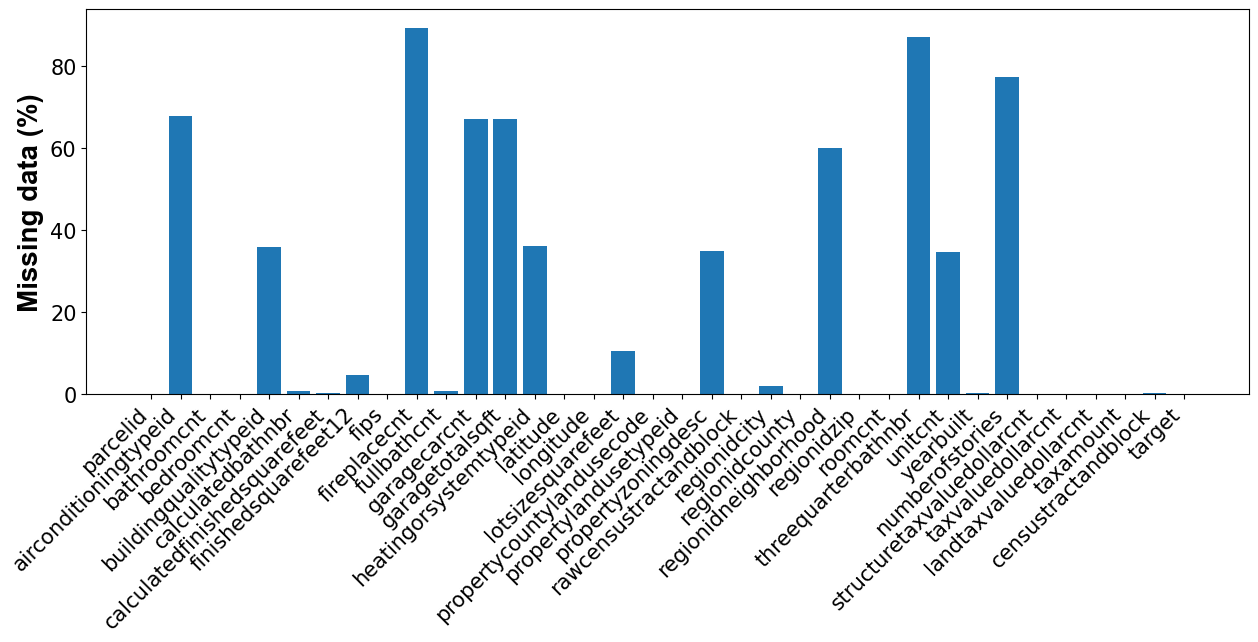

In [18]:
plt.figure(figsize=(15, 5))
plt.bar(df.columns, missing_percentage)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Missing data (%)', fontsize = 20, fontweight='bold', **csfont)
plt.xticks(rotation=45, ha='right')

#### We can see that we have several columns to take care of. For this, we will fill the missing values with:

#### - Mean value for the continuous numerical columns
#### - Mode value for the categorical columns

In [20]:
for col in df.columns:                                               # Looping through all the columns in the dataframe
    if df[col].dtype == 'object':                                    # Checking if the value of the data in the columm is an object
        df[col] = df[col].fillna(df[col].mode()[0])                  # Filling the missing values with the mode value (remember to include [0] to take the first value)
    elif df[col].dtype == 'float64' or df[col].dtype == 'int64':     # Checking if the value of the data in the column is numerical
        df[col] = df[col].fillna(df[col].mean())                     # Filling the missing values with the mean value

In [21]:
df.isnull().sum()

parcelid                        0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt                         0
yearbuilt                       0
numberofstorie

## Exploratory Data Analysis

#### Let's start by checking the outliers of the data

Text(0.5, 1.0, 'Distribution of Target')

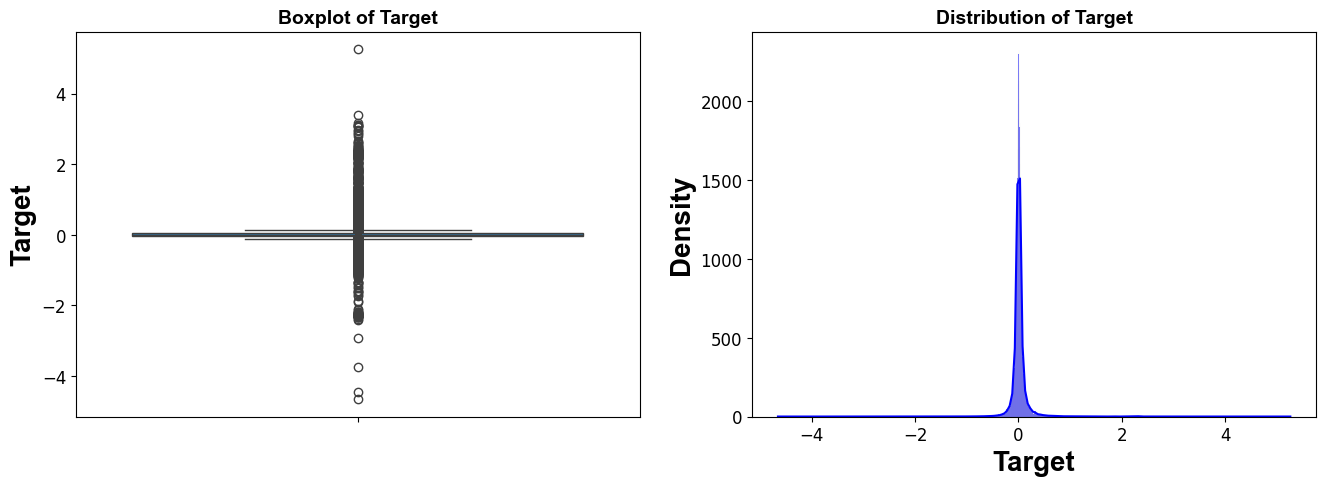

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  
csfont = {'fontname': 'Arial'}

sns.boxplot(df['target'], ax=axes[0])
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_ylabel('Target', fontsize=20, fontweight='bold', **csfont)
axes[0].set_title("Boxplot of Target", fontweight='bold', fontsize=14, **csfont)

sns.histplot(df['target'], ax=axes[1], kde=True, color='blue')
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].set_xlabel('Target', fontsize=20, fontweight='bold', **csfont)
axes[1].set_ylabel('Density', fontsize=20, fontweight='bold', **csfont)
axes[1].set_title("Distribution of Target", fontweight='bold', fontsize=14, **csfont)

#### As we can see, there are a considerable amount of outliers (data points that are significantly different from the majority). These type of points may distort model training, since these models assume that the data follows certain patterns and outliers can introduce 'noise'. They also can have an impact on the model accuracy. For example, a linear regression is very sensitive to outliers because they can disproportionately affect the model's parameters

#### Basically, if the outliers do not represent a valid extreme case, it is a good idea to remove them. Let's check the shape that the dataframe would have if we remove the outliers:

In [25]:
print('Shape before removal:', df.shape)
df_outliers_removed = df[(df['target'] > - 1) & (df['target'] < 1)]   # From the boxplot, we can see that the majority of the data is between -1 and 1
print('Shape after removal:', df_outliers_removed.shape)

Shape before removal: (77613, 36)
Shape after removal: (77261, 36)


#### As we can see, we are not going to lose a lot of data, so we can safely drop the values

In [27]:
df = df_outliers_removed

Text(0.5, 1.0, 'Distribution of Target')

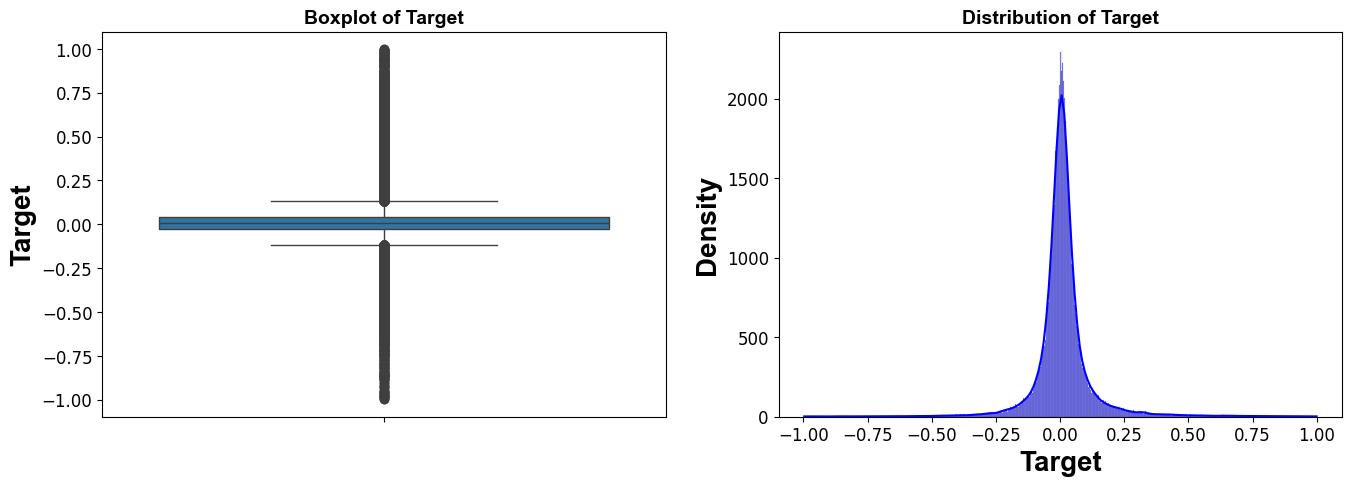

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  
csfont = {'fontname': 'Arial'}

sns.boxplot(df['target'], ax=axes[0])
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_ylabel('Target', fontsize=20, fontweight='bold', **csfont)
axes[0].set_title("Boxplot of Target", fontweight='bold', fontsize=14, **csfont)

sns.histplot(df['target'], ax=axes[1], kde=True, color='blue')
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].set_xlabel('Target', fontsize=20, fontweight='bold', **csfont)
axes[1].set_ylabel('Density', fontsize=20, fontweight='bold', **csfont)
axes[1].set_title("Distribution of Target", fontweight='bold', fontsize=14, **csfont)

#### Now, let's check the correlation of the columns. For that, first we are going to apply an encoder to the categorical data

In [30]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77261 entries, 0 to 77612
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   parcelid                      77261 non-null  int64
 1   airconditioningtypeid         77261 non-null  int64
 2   bathroomcnt                   77261 non-null  int64
 3   bedroomcnt                    77261 non-null  int64
 4   buildingqualitytypeid         77261 non-null  int64
 5   calculatedbathnbr             77261 non-null  int64
 6   calculatedfinishedsquarefeet  77261 non-null  int64
 7   finishedsquarefeet12          77261 non-null  int64
 8   fips                          77261 non-null  int64
 9   fireplacecnt                  77261 non-null  int64
 10  fullbathcnt                   77261 non-null  int64
 11  garagecarcnt                  77261 non-null  int64
 12  garagetotalsqft               77261 non-null  int64
 13  heatingorsystemtypeid         77261 

#### Now that the data is encoded, let's check the correlation:


Text(0.5, 1.0, 'Correlation map')

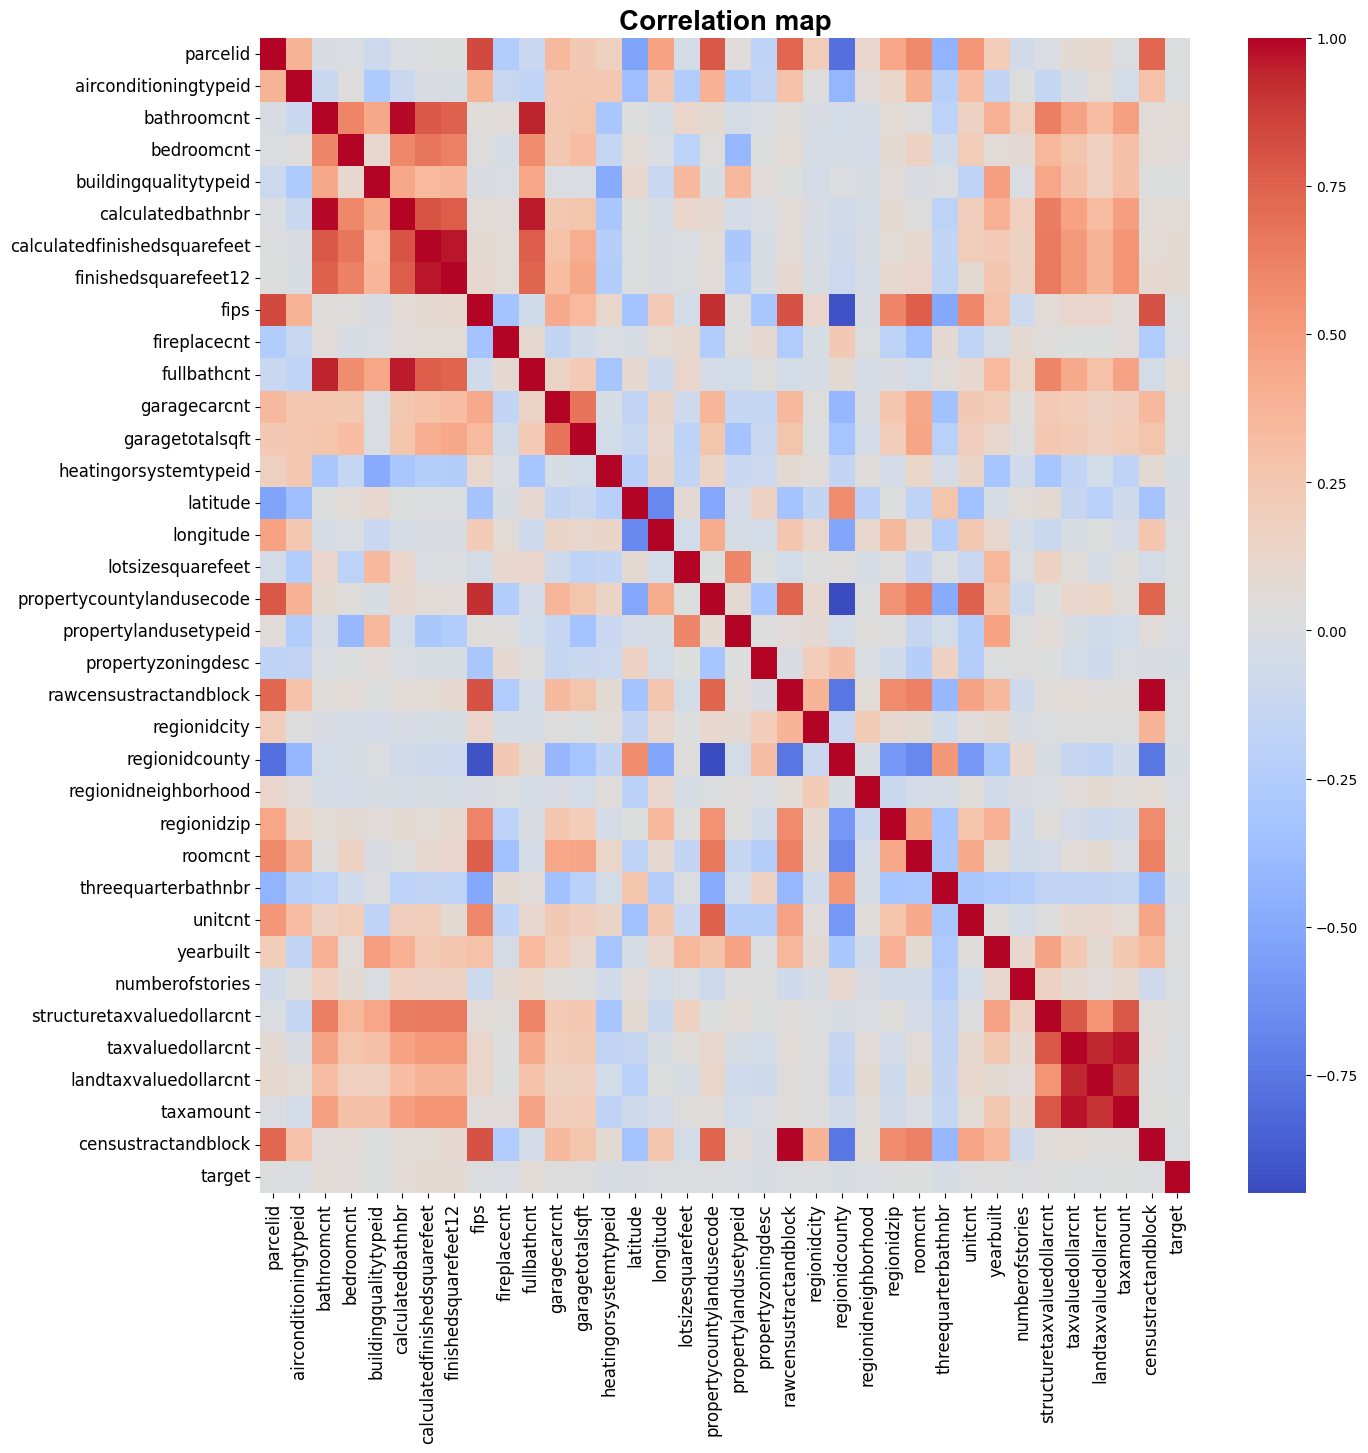

In [33]:
corr = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot = False, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### We can see that there are some highly correlated features in the map, so we will remove them to decrease the complexity of the data that we will use to train the model.

In [35]:
columns_remove = ['calculatedbathnbr', 
             'fullbathcnt', 
             'fips',
             'rawcensustractandblock', 
             'taxvaluedollarcnt',
             'finishedsquarefeet12', 
             'landtaxvaluedollarcnt']

df.drop(columns_remove, axis=1, inplace=True)

## Train/test split

In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model training

#### In this exercise, we will be using some known ML models, such as Linear Regression, and some new models:

#### Lasso --> This model is based on linear regression and adds a penalty equal to the absolute value of the coefficients to the loss function. Lasso can shrink some coefficients to zero, effectively performing feature selection by removing irrelevant features from the model. It is usually employed when you want a sparse model with fewer features.

#### Ridge --> Another linear regression-based model that adds a penalty equal to the square of the coefficients to the loss function. This model shrinks coefficients but does not set them to zero, making it less aggressive in feature selection compared to lasso. It is usually used when you want to reduce overfitting without completely removing features.

#### Elastic net --> This model combines L1 (absolute values from Lasso) and L2 (squared values from Ridge) regularisation to leverage the strengts of both Lasso and Ridge models. This model handles multicollinearity, but id does not perform feature selection, since it combines feature selection with Ridge's ability to deal with correlated predictors. This model works better with high-dimensional data with many predictors, even if some of them may be redundant or correlated.

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
classifier_lr = LinearRegression()
classifier_lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import mean_absolute_error as mae

print('Training error: ', mae(y_train, classifier_lr.predict(X_train)))
print('Validation error: ', mae(y_test, lr_ypred))

Training error:  18931.809106840046
Validation error:  19008.345191758646


## Lasso

In [48]:
from sklearn.linear_model import Lasso
classifier_lss = Lasso()
classifier_lss.fit(X_train, y_train)

Lasso()

In [50]:
lss_ypred = classifier_lss.predict(X_test)

print('Training error: ', mae(y_train, classifier_lss.predict(X_train)))
print('Validation error: ', mae(y_test, lss_ypred))

Training error:  18932.036132790334
Validation error:  19008.505739695047


## Ridge

In [53]:
from sklearn.linear_model import Ridge
classifier_rd = Ridge()
classifier_rd.fit(X_train, y_train)

Ridge()

In [55]:
rd_ypred = classifier_rd.predict(X_test)

print('Training error: ', mae(y_train, classifier_rd.predict(X_train)))
print('Validation error: ', mae(y_test, rd_ypred))

Training error:  18931.814207527892
Validation error:  19008.347390911018


## Elastic Net

In [61]:
from sklearn.linear_model import ElasticNet
classifier_en = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
classifier_en.fit(X_train, y_train)

ElasticNet()

In [63]:
en_ypred = classifier_en.predict(X_test)

print('Training error: ', mae(y_train, classifier_en.predict(X_train)))
print('Validation error: ', mae(y_test, en_ypred))

Training error:  18989.68166999059
Validation error:  19047.153661725624
